<a href="https://colab.research.google.com/github/niya-c-anto/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_url = '/content/sample_submission.csv'
data = pd.read_csv(data_url)
data

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 38ms/step - accuracy: 0.8080 - loss: 0.6267 - val_accuracy: 0.9867 - val_loss: 0.0476
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.9743 - loss: 0.0858 - val_accuracy: 0.9905 - val_loss: 0.0371
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9833 - loss: 0.0552 - val_accuracy: 0.9898 - val_loss: 0.0342
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9887 - loss: 0.0396 - val_accuracy: 0.9912 - val_loss: 0.0309
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9913 - loss: 0.0303 - val_accuracy: 0.9923 - val_loss: 0.0304
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9920 - loss: 0.0263 - val_accuracy: 0.9920 - val_loss: 0.0300
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.

Final test accuracy: 0.9900
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step


Text(95.72222222222221, 0.5, 'Truth')

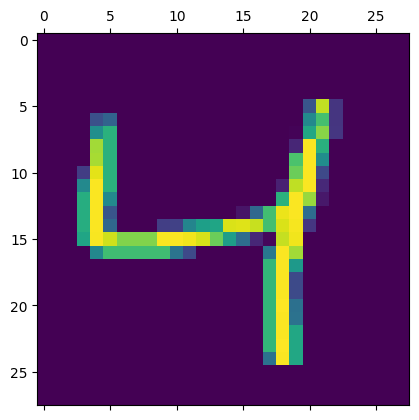

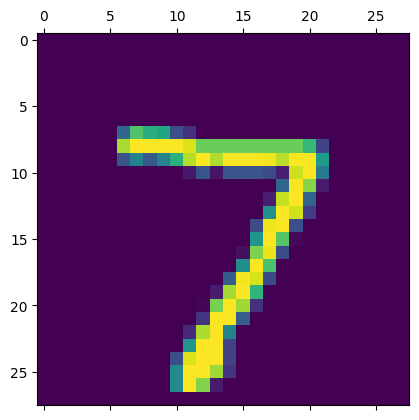

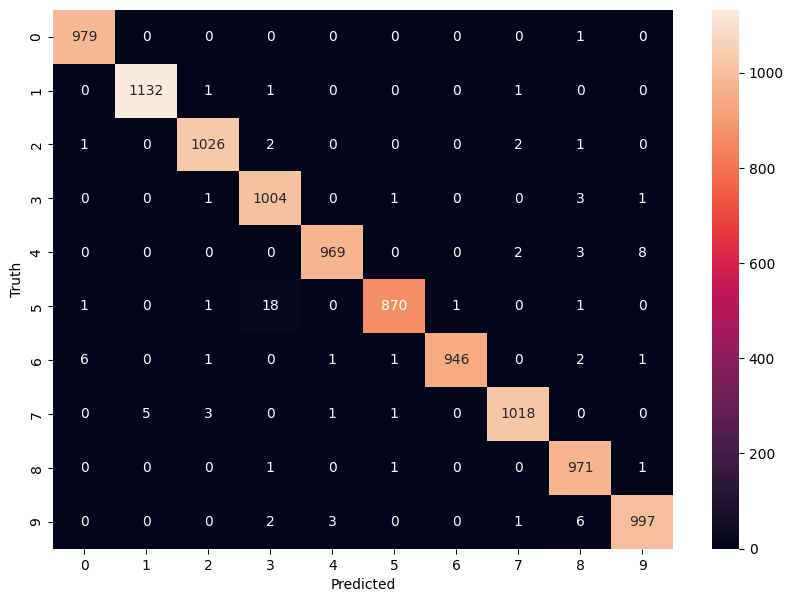

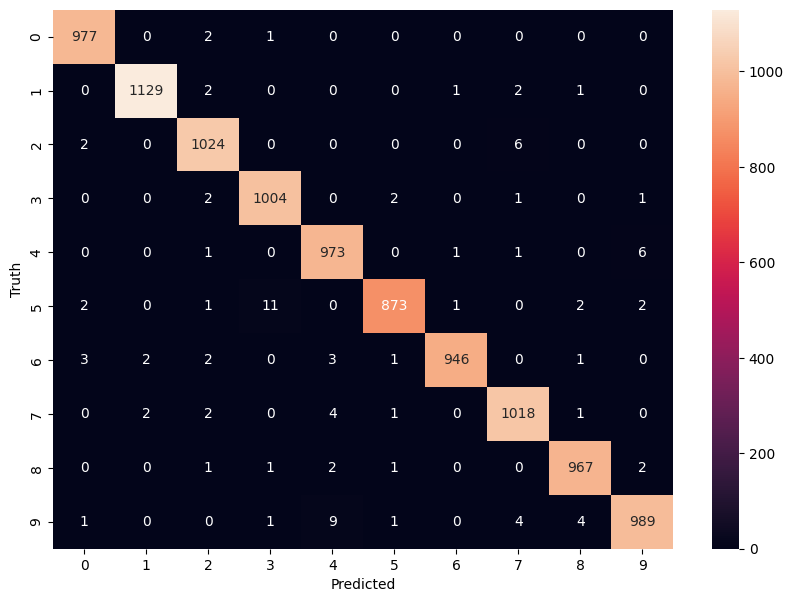

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Lambda,Dropout
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
len(X_train)
len(X_test)
X_train[0].shape
X_train[0]
plt.matshow(X_train[2])
y_train[2]
y_train[:5]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train.shape
X_test.shape
X_train[0]
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Define the model
model = Sequential([
    # Reshape and convert grayscale to RGB
    Lambda(lambda x: tf.image.grayscale_to_rgb(tf.image.resize(tf.expand_dims(x, axis=-1), (224, 224)))),

    # Add the pre-trained MobileNetV2 model
    base_model,

    # Flatten the output
    Flatten(),

    # Dense layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
plt.matshow(X_test[0])
y_predicted=model.predict(X_test)
y_predicted[0]
np.argmax(y_predicted[0])
y_test[:5]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# Fine-tuning
# Unfreeze the top layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-6),  # Lower learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(X_train, y_train,
                         batch_size=32,
                         epochs=5,
                         validation_split=0.1,
                         verbose=1)
# Final evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final test accuracy: {test_accuracy:.4f}")
model.save('mobilenet_mnist.h5')
y_predicted1=model.predict(X_test)
y_predicted_labels1=[np.argmax(i) for i in y_predicted1]
cm1=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)
cm1
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Lambda, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Define the ResNet50 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Define the complete model
model = Sequential([
    # Convert grayscale to RGB and resize to match ResNet50 input size
    Lambda(lambda x: tf.image.grayscale_to_rgb(tf.image.resize(tf.expand_dims(x, axis=-1), (224, 224)))),

    # Add the ResNet50 base model
    base_model,

    # GlobalAveragePooling instead of Flatten to reduce overfitting
    GlobalAveragePooling2D(),

    # Add fully connected layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),

    # Output layer with 10 units for the 10 MNIST classes
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Visualize the predictions
plt.matshow(X_test[0])
plt.title(f"True label: {y_test[0]}")
plt.show()

# Make predictions
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(f"Predicted labels for first 5 test images: {y_predicted_labels[:5]}")
print(f"True labels for first 5 test images: {y_test[:5]}")

# Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Fine-tuning: unfreeze some layers in the ResNet50 model
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Unfreeze last 20 layers
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training with fine-tuning
history_fine = model.fit(X_train, y_train,
                         batch_size=32,
                         epochs=5,
                         validation_split=0.1,
                         verbose=1)

# Final evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('resnet50_mnist.h5')

# Updated predictions after fine-tuning
y_predicted1 = model.predict(X_test)
y_predicted_labels1 = [np.argmax(i) for i in y_predicted1]

# Confusion matrix after fine-tuning
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels1)
plt.figure(figsize=(10, 7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 175s 95ms/step - accuracy: 0.1440 - loss: 2.3064 - val_accuracy: 0.4867 - val_loss: 1.6631
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 187s 90ms/step - accuracy: 0.4255 - loss: 1.6152 - val_accuracy: 0.7493 - val_loss: 0.8854
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 201s 90ms/step - accuracy: 0.6289 - loss: 1.0704 - val_accuracy: 0.8032 - val_loss: 0.6586
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 197s 87ms/step - accuracy: 0.7005 - loss: 0.8610 - val_accuracy: 0.8398 - val_loss: 0.5218
Epoch 5/10
